## 1 Importer

In [1]:
#Imports
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as smp
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import f_regression, SelectKBest, r_regression
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator
from collections import Counter
from sklearn import linear_model


## 2 Klassifikation, läs in dataset

In [ ]:
train_df = pd.read_csv('../datasets/class_train.csv')
test_df = pd.read_csv('../datasets/class_test.csv')

Splitta upp i X_train, y_train, X_test, y_test, där X är alla labels förutom Outcome och y är Outcome

In [ ]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

In [ ]:
X_train

In [ ]:
y_train

### 2.1 DataAnalys, Kolla klass imbalans och Null värden

In [ ]:
train_df.isnull().values.any().sum()

In [ ]:
test_df.isnull().values.any().sum()

In [ ]:
outcome = sns.countplot(x=train_df['Outcome'])
outcome.set_xticklabels(['Outcome0','Outcome1'])
plt.show()

Testar Imbalanced learn paketet och använder SMOTE - Synthetic Minority Over-sampling Technique för att göra Over_sampling.

In [ ]:
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

### 2.2 Modell

Här används LogisticRegression utan SMOTE. F1-weighted score = 0.49

In [ ]:
clf_log_reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf_log_reg.fit(X_train, y_train)

y_pred_cls_log = clf_log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_cls_log)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred_cls_log))

Här används LogisticRegression med SMOTE. F1-weighted score = 0.53

In [ ]:
imba_pipeline_log_reg = smp(SMOTE(),
                StandardScaler(),
                    LogisticRegression(random_state=0))
imba_pipeline_log_reg.fit(X_train, y_train)

y_pred_imba_pipline_log_reg = imba_pipeline_log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_imba_pipline_log_reg)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred_imba_pipline_log_reg))

Här används KNeighborsClassifier utan SMOTE. F1-weighted score = 0.45

In [ ]:
clf_k_neig = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
clf_k_neig.fit(X_train, y_train)

y_pred_clf_k_neig = clf_k_neig.predict(X_test)

cm = confusion_matrix(y_test, y_pred_clf_k_neig)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred_clf_k_neig))

Här används KNeighborsClassifier med SMOTE. F1-weighted score = 0.49

In [ ]:
imba_pipeline_k_neig = smp(SMOTE(),
                StandardScaler(),
                KNeighborsClassifier(n_neighbors=5))
imba_pipeline_k_neig.fit(X_train, y_train)

y_pred_imba_pipline_k_neig = imba_pipeline_k_neig.predict(X_test)

cm = confusion_matrix(y_test, y_pred_imba_pipline_k_neig)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred_imba_pipline_k_neig))

# 3 Regression

### 3.1 Load Data / Drop Na

In [2]:
regression_test_data = pd.read_csv('../datasets/regression_test.csv')
regression_train_data = pd.read_csv('../datasets/regression_train.csv')
regression_test_data.dropna(axis=1, inplace=True)
regression_train_data.dropna(axis=1, inplace=True)
[regression_test_data.drop(y, axis=1, inplace=True) for y in list(regression_test_data.columns) if y not in list(regression_train_data.columns)]

[None]

### 3.2 Correlations to Sale price

#### 3.2.1 Drop String values

In [3]:
cols=list(regression_train_data.columns)
for col in cols:
    if regression_train_data[col].dtype == object:
        regression_test_data.drop(col, axis=1, inplace=True)
        regression_train_data.drop(col, axis=1, inplace=True)
cols= list(regression_train_data.columns)

#### 3.2.2 Get Features using sklearn

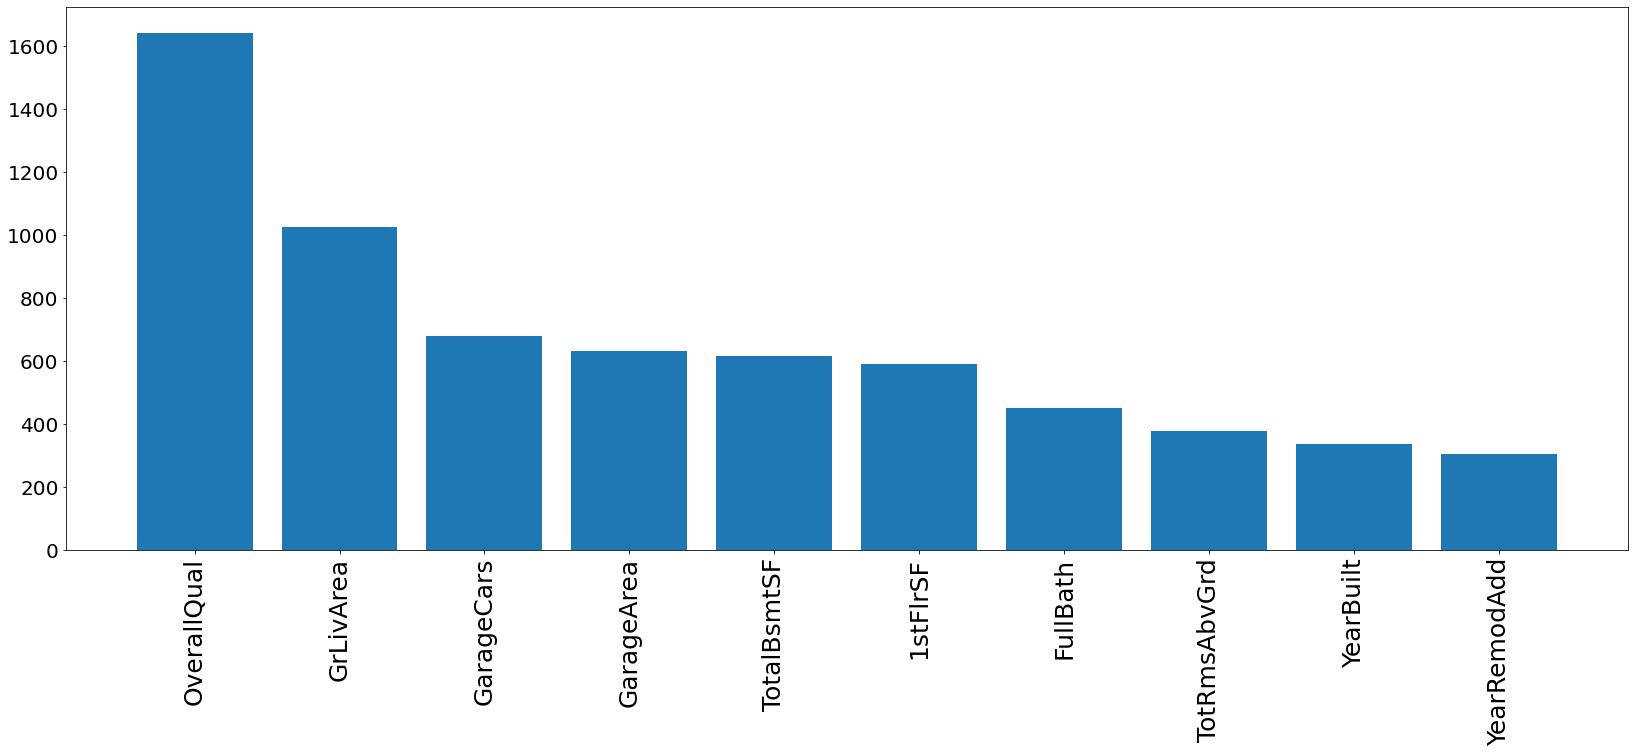

In [4]:
y_train=regression_train_data['SalePrice']

X_train=regression_train_data.drop('SalePrice', axis=1)

selector = SelectKBest(f_regression, k = 10)

X_new = selector.fit_transform(X_train, y_train)

names = X_train.columns.values[selector.get_support()]

scores = selector.scores_[selector.get_support()]

corr_sklearn_f_regression = pd.Series(data=scores, index=names, name='SalePrice')
corr_sklearn_f_regression.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(28,10))
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=20)
plt.bar(corr_sklearn_f_regression.index, corr_sklearn_f_regression.values)
plt.show()

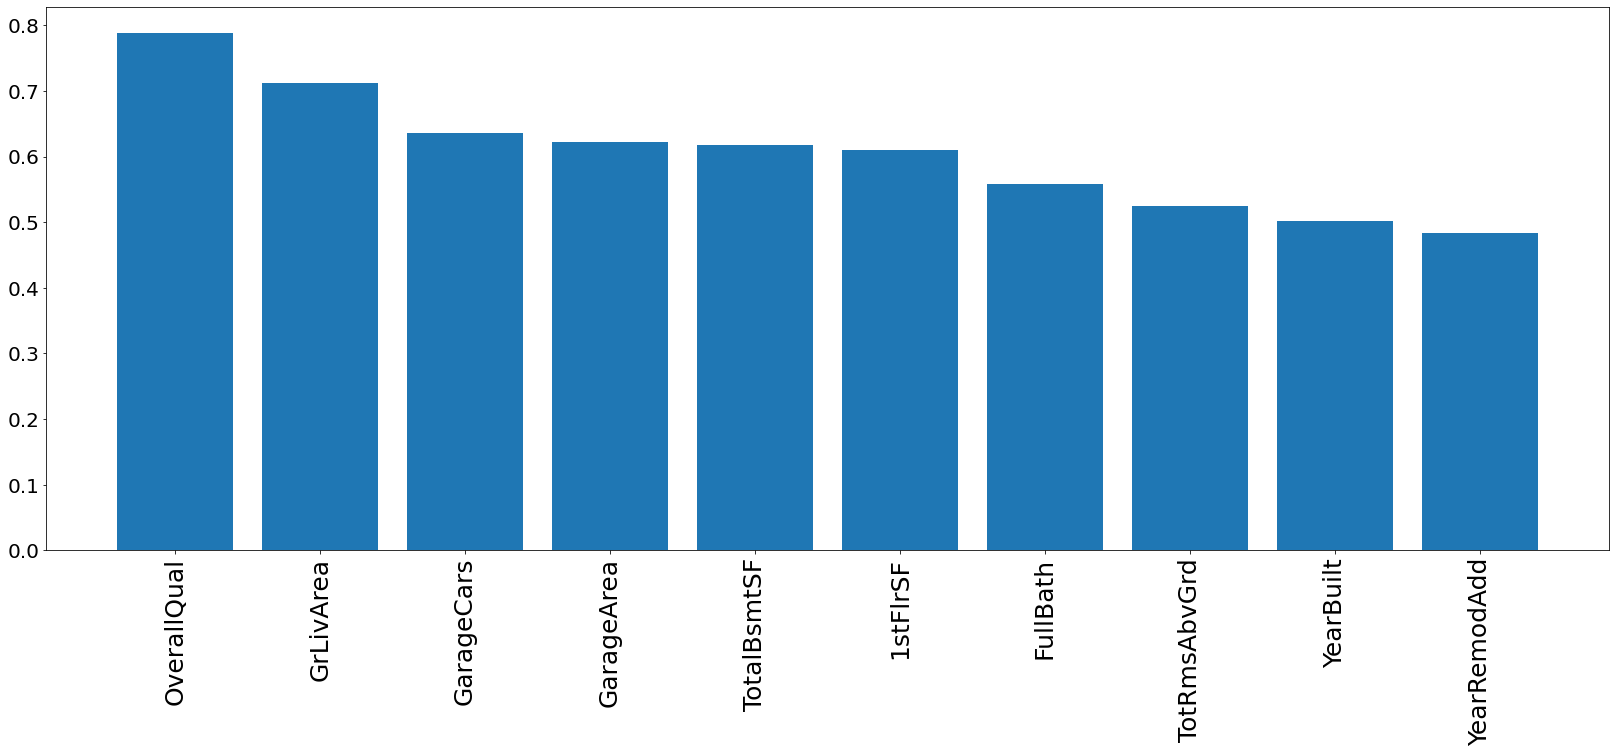

In [5]:
y_train=regression_train_data['SalePrice']

X_train=regression_train_data.drop('SalePrice', axis=1)

selector = SelectKBest(r_regression, k = 10)

X_new = selector.fit_transform(X_train, y_train)

names = X_train.columns.values[selector.get_support()]

scores = selector.scores_[selector.get_support()]

names_scores = list(zip(names, scores))

ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'R_Scores'])

corr_sklearn_r_regression = pd.Series(data=scores, index=names, name='SalePrice')
corr_sklearn_r_regression.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(28,10))
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=20)
plt.bar(corr_sklearn_r_regression.index, corr_sklearn_r_regression.values)
plt.show()

In [6]:
# corr_sklearn_f_regression = pd.DataFrame(corr_sklearn_f_regression)
# corr_sklearn_f_regression['method']='sklearn f_regression'
corr_sklearn_r_regression = pd.DataFrame(corr_sklearn_r_regression)
corr_sklearn_r_regression['method']='sklearn r_regression (pearson)'

# compare_sklearn = pd.concat([corr_sklearn_f_regression, corr_sklearn_r_regression])

#### 3.2.3 Get features using Pandas correlations

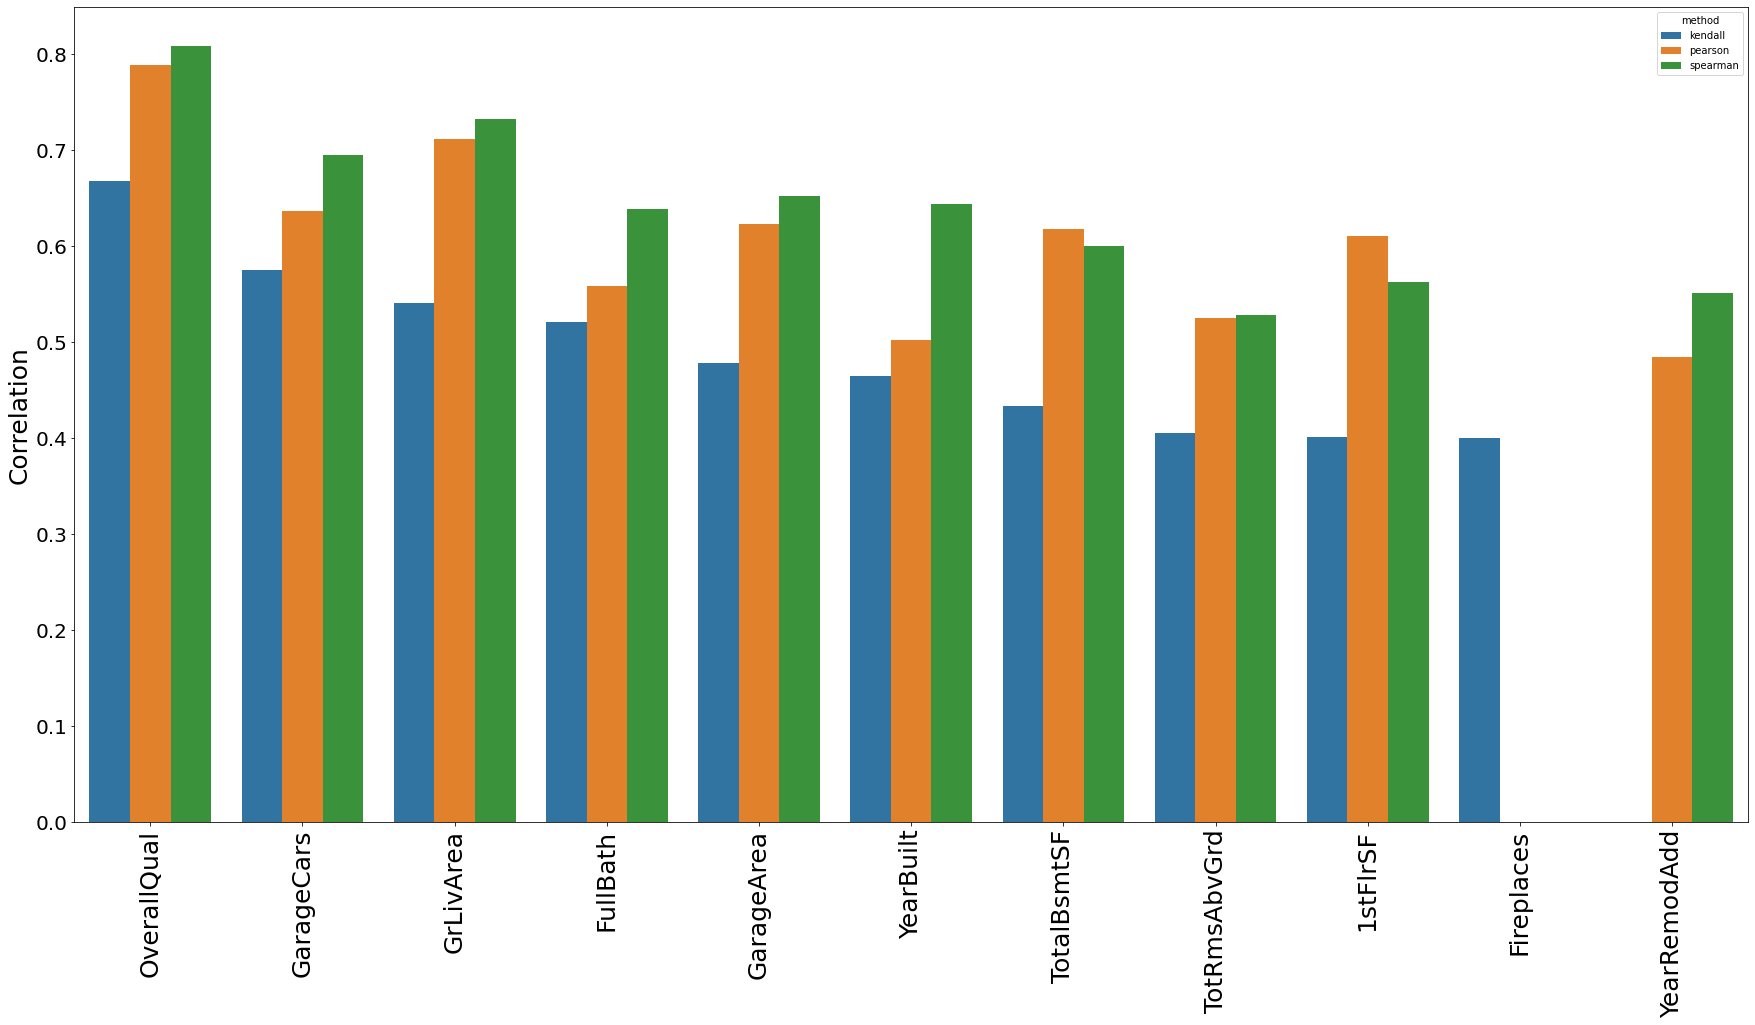

In [7]:
corrs_pearson=regression_train_data.corr(method='pearson')['SalePrice'][:]
corrs_kendall=regression_train_data.corr(method='kendall')['SalePrice'][:]
corrs_spearman=regression_train_data.corr(method='spearman')['SalePrice'][:]

corrs_pearson.sort_values(ascending=False, inplace=True)
corrs_kendall.sort_values(ascending=False, inplace=True)
corrs_spearman.sort_values(ascending=False, inplace=True)

corrs_pearson=pd.DataFrame(corrs_pearson[1:11])
corrs_spearman=pd.DataFrame(corrs_spearman[1:11])
corrs_kendall=pd.DataFrame(corrs_kendall[1:11])
corrs_pearson['method'] = 'pearson'
corrs_spearman['method']='spearman'
corrs_kendall['method']='kendall'

compare = pd.concat([corrs_kendall, corrs_pearson, corrs_spearman])

plt.figure(figsize=(30,15))
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=20)
sns.barplot(x=compare.index, y=compare['SalePrice'], data=compare, hue='method')
plt.ylabel('Correlation', fontsize=25)
plt.show()

#### 3.2.4 Compare Features

In [8]:
compare_all = pd.concat([compare, corr_sklearn_r_regression])

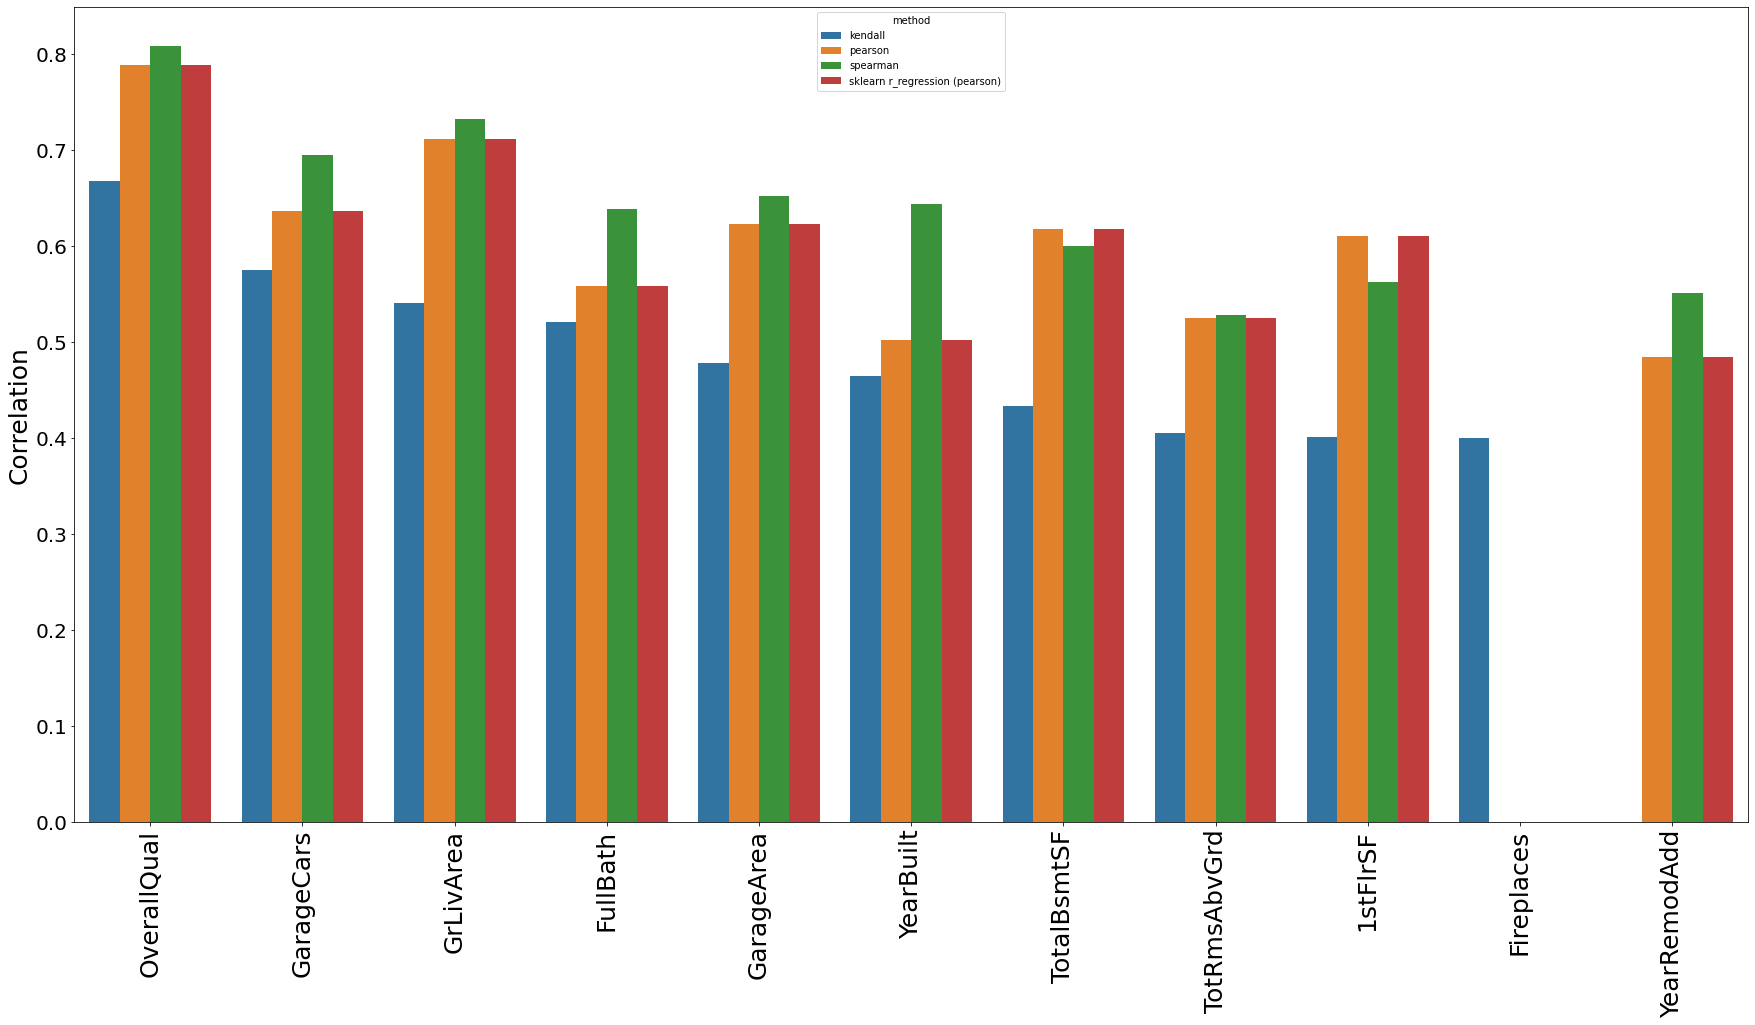

In [9]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=20)
sns.barplot(x=compare_all.index, y=compare_all['SalePrice'], data=compare_all, hue='method')
plt.ylabel('Correlation', fontsize=25)
plt.show()

### 3.4 Linear Regression

#### 3.4.1 Choose Relevant Features

In [10]:
X_train = np.array(regression_train_data['OverallQual'])
X_test = np.array(regression_test_data['OverallQual'])
X_test_plot = X_test
X_train=X_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)

y_train = regression_train_data['SalePrice']
y_test = regression_test_data['SalePrice']

#### 3.4.2 Predict without OneHot

Coefficients: 
 [46436.85632268]
Mean squared error: 1952758976.43
Coefficient of determination: 0.63


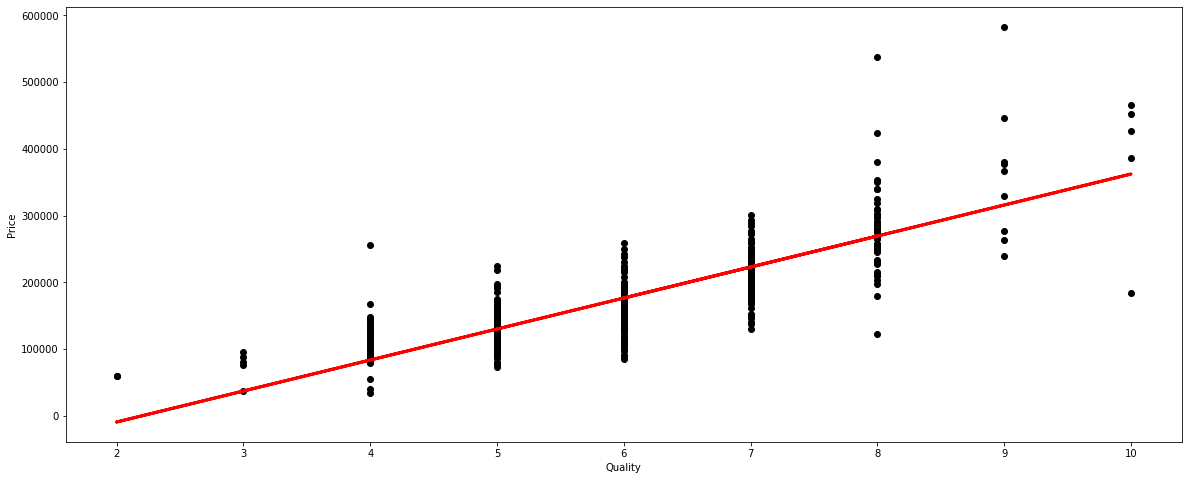

In [11]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(20,8))
plt.scatter(X_test_plot, y_test, color="black")

plt.plot(X_test_plot, y_pred, color="red", linewidth=3)
plt.xlabel('Quality')
plt.ylabel('Price')


plt.show()

#### 3.4.3 Predict With OneHot

In [12]:
enc = OneHotEncoder(sparse=False)
X_train = enc.fit_transform(X_train)
X_test = enc.fit_transform(X_test)
X_test = np.array([np.append(0, x) for x in X_test])

Coefficients: 
 [-8.95670125e+17 -8.95670125e+17 -8.95670125e+17 -8.95670125e+17
 -8.95670125e+17 -8.95670125e+17 -8.95670125e+17 -8.95670125e+17
 -8.95670125e+17 -8.95670125e+17]
Mean squared error: 1782794995.60
Coefficient of determination: 0.66


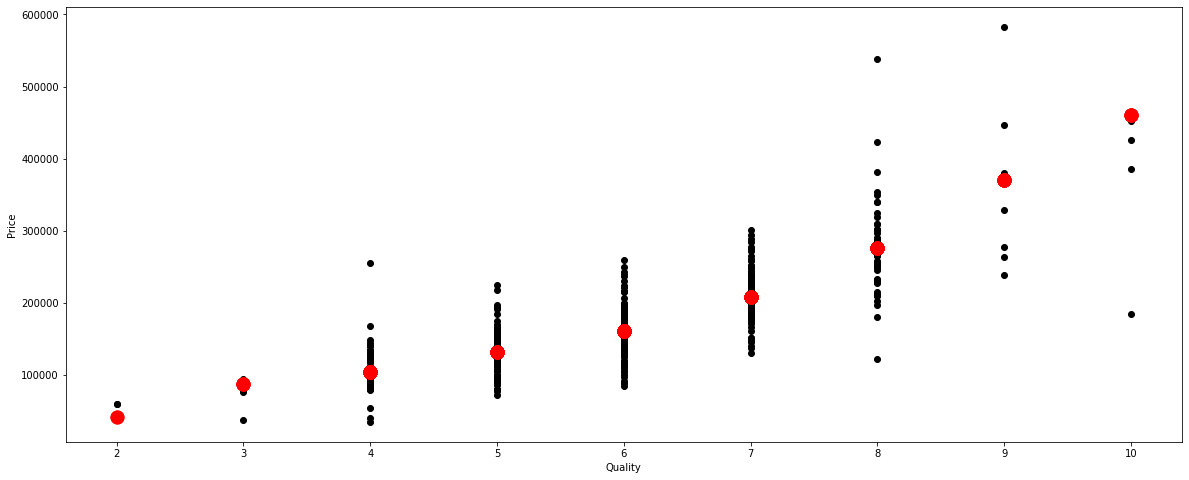

In [13]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(20,8))
plt.scatter(X_test_plot, y_test, color="black")

plt.scatter(X_test_plot, y_pred, color="red", linewidths=8)
plt.xlabel('Quality')
plt.ylabel('Price')


plt.show()

### 3.5 Multiple Regression With 10 Features

#### 3.5.1 Choose Relevant Features

In [14]:
X_train = regression_train_data[list(corrs_pearson.index)]
X_test = regression_test_data[list(corrs_pearson.index)]

#### 3.5.2 Predict

In [15]:

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [ 2.02267756e+04  5.79164378e+01  1.51195228e+04 -4.56784387e+00
  2.06581279e+01  1.53210179e+01 -6.91446366e+03 -1.76875259e+03
  2.60709748e+02  2.77786002e+02]
Mean squared error: 1262393168.31
Coefficient of determination: 0.76


# 4 Klustering

### Läs in data

In [ ]:
cluster_df = pd.read_csv('../datasets/cluster_Data.csv')

In [ ]:
cluster_df

In [ ]:
cluster_array = cluster_df.to_numpy()

In [ ]:
cluster_array

Standariserar värdena i cluster_array med hjälp av scikit-learn StandardSclaer()

In [ ]:
scaler = StandardScaler()
scaled_cluster_array = scaler.fit_transform(cluster_array)

In [ ]:
scaled_cluster_array

Tar reda på optimala k med hjälp av the elbow method.

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(scaled_cluster_array)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")
print(kl.elbow)

Testar silhouette_coefficients för att ta reda på optimala k

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_cluster_array)
    score = silhouette_score(scaled_cluster_array, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_cluster_array)
y_kmeans = kmeans.predict(scaled_cluster_array)

In [ ]:
kmeans.labels_

In [ ]:
Counter(kmeans.labels_)

In [ ]:
plt.scatter(scaled_cluster_array[:, 0], scaled_cluster_array[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)